In [9]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
import matplotlib.pyplot as plt

In [10]:
@dataclass
class LinearPerceptron:
    """Perceptron with a linear activation function"""
    w: np.array
    w0: float
        
    def predict(self, x: np.array):
        return self.w0 + self.w @ x
    
    def error(self, xs: np.ndarray, ys: np.array):
        return sum([(y - self.predict(x)) ** 2 for x, y in zip(xs, ys)]) / len(ys)
    
    @classmethod
    def from_gradient_descent(cls, xs: np.ndarray, ys: np.array, learning_rate: float, epochs: int, max_w: float):
        """abs(fitted weights) cannot exceed max_w. Prevents weights blowing up if learning rate too high"""
        
        feature_count = len(xs[0])
        w = np.zeros(feature_count)
        w0 = 0
        
        intermediate_perceptrons = []
        
        for e in range(epochs):
            
            intermediate_perceptrons.append(cls(w, w0))
            
            w = np.clip(
                w + 2 * learning_rate * sum([x * (y - w @ x - w0) for x, y in zip(xs, ys)]), 
                -max_w, 
                max_w
            )
            
            w0 = np.clip(
                w0 + 2 * learning_rate * sum([1 * (y - w @ x - w0) for x, y in zip(xs, ys)]),
                -max_w, 
                max_w
            )
            
        final_perceptron = cls(w, w0)

        return final_perceptron, intermediate_perceptrons    

# Create data

In [3]:
W0 = -0.5
W = np.array([-0.5, 0.2, 1, -1])
N = 300
noise_level = 0.5

xs = np.random.uniform(-1, 1, size=(N, len(W)))
ys = W0 + W @ xs.T + np.random.normal(0, noise_level, size=N)

xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys)

# Train perceptron

In [4]:
epochs = 50
learning_rate = 0.001
max_w = 3

perceptron, intermediate_perceptrons = LinearPerceptron.from_gradient_descent(xs_train, ys_train, learning_rate, epochs, max_w)

In [5]:
print("Fitted w0: ", perceptron.w0)
print("Fitted w: ", perceptron.w)

Fitted w0:  -0.49912886219169933
Fitted w:  [-0.41719496  0.17294459  1.03137343 -0.95731128]


Text(0, 0.5, 'weight')

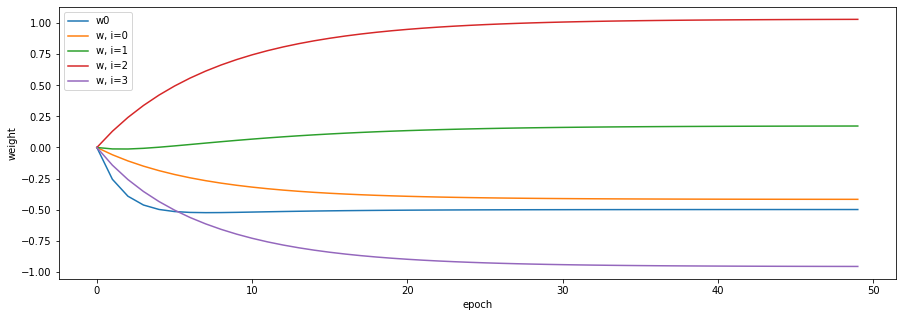

In [6]:
plt.figure(figsize=(15, 5))

plt.plot(
    range(len(intermediate_perceptrons)), 
    [intermediate_perceptrons[i].w0 for i in range(len(intermediate_perceptrons))],
    label='w0'
)

for feature in range(len(perceptron.w)):
    plt.plot(
        range(len(intermediate_perceptrons)), 
        [intermediate_perceptrons[i].w[feature] for i in range(len(intermediate_perceptrons))],
        label=f'w, i={feature}'
    )
    
plt.legend()
plt.xlabel('epoch')
plt.ylabel('weight')

# Test perceptron

In [7]:
print("Training error: ", perceptron.error(xs_train, ys_train))
print("Test error: ", perceptron.error(xs_test, ys_test))

Training error:  0.28007888406566883
Test error:  0.21895509076185676


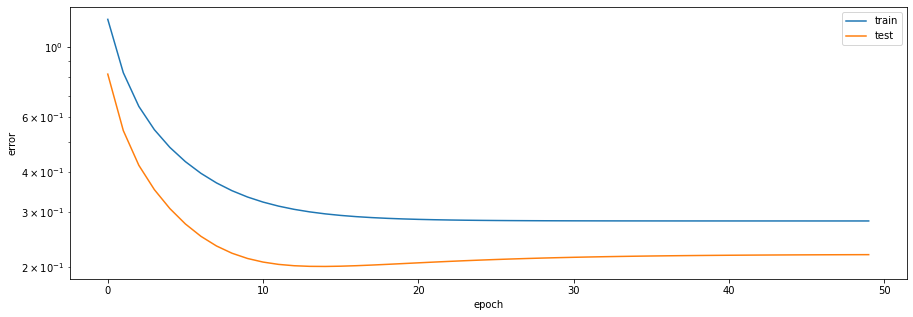

In [8]:
plt.figure(figsize=(15, 5))

plt.plot(
    range(len(intermediate_perceptrons)), 
    [intermediate_perceptrons[i].error(xs_train, ys_train) for i in range(len(intermediate_perceptrons))],
    label='train'
)

plt.plot(
    range(len(intermediate_perceptrons)), 
    [intermediate_perceptrons[i].error(xs_test, ys_test) for i in range(len(intermediate_perceptrons))],
    label='test'
)

plt.legend()
plt.xlabel('epoch')
plt.ylabel('error')
plt.yscale('log')